<a href="https://colab.research.google.com/github/CyJavac/CIENCIA_DATOS_2025/blob/main/Clase_4_Medidas_Tendencia_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agenda
1. Definir conceptos
2. Cargar datos desde drive
3. Calculo de la desviación estandar
4. Exploración de distribucion de datos (gráficos)

##1. Definición de conceptos
1.1 Varianza

1.2 Desviación estándar

1.3 Desviación de la media absoluta

1.4 Desviación absoluta mediana de la mediana (MAD)

1.5 Rango

1.6 Estadistica ordinal

1.7 Percentil

1.8 Rango intercuartil (IQR)

##1. Definición de conceptos

**1.1 Varianza:** La varianza dice qué tan dispersos están los números con respecto a su promedio (la media). Si es alta, los números están muy separados; si es baja, están más juntos.

**1.2 Desviación estándar:** Raíz cuadrada de la varianza. Mide la dispersión de los datos. Como la "distancia promedio" de cada número a la media.

**1.3 Desviación de la media absoluta:** Mide la dispersión, pero usa el valor absoluto de las diferencias entre cada punto de datos y la media. Es menos sensible a valores extremos que la desviación estándar.

**1.4 Desviación absoluta mediana de la mediana (MAD):** Medida de dispersión que se basa en la mediana en lugar de la media. Útil cuando hay valores atípicos en los datos, ya que no les afecta tanto como la desviación estándar.

**1.5 Rango:** Es la diferencia entre el valor más alto y el valor más bajo en un conjunto de datos.

**1.6 Estadística ordinal:** Datos que tienen un orden o clasificación, como "pequeño, mediano, grande".

**1.7 Percentil:** Es el valor por debajo del cual cae un cierto porcentaje de los datos en un conjunto ordenado. Por ejemplo, el percentil 75 es el valor por debajo del cual se encuentra el 75% de los datos.

**1.8 Rango intercuartil (IQR):** Es la diferencia entre el tercer cuartil (Q3, el percentil 75) y el primer cuartil (Q1, el percentil 25). Representa el rango del 50% central de los datos y es una medida de dispersión robusta frente a valores atípicos.

Referencias:
https://es.khanacademy.org/math/estadistica-y-probabilidad-pe-pre-u/x82899e311ce16938:estadistica

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install wquantiles

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
import wquantiles

In [25]:
data = pd.read_csv("/content/drive/MyDrive/8vo Semestre/Fundamentos ciencia de datos/state.csv")

In [6]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [10]:
mayor_poblacion=data.groupby(["Population"])["State"].max()
mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [13]:
#calculando la desviación estandar y los cuantiles
data["Population"].std()

6848235.347401142

In [16]:
#Extraer la desvicaion estandar de la tasa de asesinatos
data["Murder.Rate"].std()

1.915736124302923

In [14]:
#Calcilar el IQR
data.Population.quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [15]:
#Calcular el IQR de la tasa de asesinatos
data["Murder.Rate"].quantile(0.75)-data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [17]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [18]:
#Calcula el MAD de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


##HINT - Trabajo con dataframes


In [20]:
data1={"Nombre":["Camilo","Kevin","Santiago"],
       "Edades":["10","15","3"],
       "Juegos":["Basketball","Tenis de mesa","Fulbo"]
      }

df=pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Fulbo


In [22]:
#Renombrar headers
df=df.rename(columns={"Edades":"Años","Juegos":"Deportes"})
df

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Fulbo


##Tarea:
Reemplazar los headers de df "state" de inglés a español

In [39]:
data=data.rename(columns={"State":"Estado","Population":"Población","Murder.Rate":"Tasa de asesinatos","Abbreviation":"Abreviación"})
data.head()

,Estado,Población,Tasa de asesinatos,Abreviación
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


##4. Exploración en la distribución de datos
**4.1 Diagrama de caja:** Es una forma estandarizada de mostrar la distribución de datos en función de un resumen de cinco números: el mínimo, el primer cuartil (Q1), la mediana, el tercer cuartil (Q3) y el máximo.

**Cómo se lee:**

* La caja central representa el rango intercuartil (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3). El 50% central de los datos se encuentra dentro de esta caja.
* La línea dentro de la caja representa la mediana (el segundo cuartil o Q2).
* Las líneas que se extienden desde la caja se llaman "bigotes". Estos suelen extenderse hasta los valores mínimo y máximo dentro de un cierto rango (comúnmente 1.5 veces el IQR desde los bordes de la caja).
* Los puntos individuales fuera de los bigotes representan valores atípicos, que son valores extremadamente altos o bajos en comparación con el resto de los datos.



**4.2 Diagrama de frecuencias:** Un diagrama o tabla de frecuencia es una forma de organizar y mostrar cuántas veces ocurre cada valor (o rango de valores) en un conjunto de datos.

**Cómo se lee:**

* La tabla muestra las diferentes categorías o rangos de valores en una columna.
* En otra columna, muestra la frecuencia, que es el número de veces que aparece cada valor o cuántos datos caen dentro de cada rango.


**4.3 Histograma:** Un histograma es una representación gráfica de un diagrama de frecuencia, donde los datos se agrupan en "bins" o intervalos. Es similar a un diagrama de barras, pero se usa para datos numéricos continuos. Permiten visualizar la forma de la distribución de los datos, identificar picos (modas) y ver si la distribución es simétrica o sesgada.

**Cómo se lee:**

* El eje horizontal representa los rangos o intervalos de los datos (los "bins").
* El eje vertical representa la frecuencia o el conteo de cuántos puntos de datos caen dentro de cada rango.
* Las barras se dibujan adyacentes unas a otras para mostrar que los datos son continuos. La altura de cada barra indica la frecuencia de los datos en ese intervalo.


**4.4 Diagrama de densidad:** Un diagrama de densidad es una representación suavizada de la distribución de un conjunto de datos numéricos. Es una alternativa a los histogramas que muestra la forma de la distribución sin la dependencia de la elección de "bins". Son útiles para visualizar la forma general de la distribución, identificar si hay múltiples picos (distribuciones multimodales) y comparar la distribución de diferentes conjuntos de datos en el mismo gráfico.

**Cómo se lee:**

* El eje horizontal representa los valores de los datos.
* El eje vertical representa la densidad de probabilidad estimada. La altura de la curva en un punto indica la probabilidad relativa de encontrar un valor en ese punto. El área total bajo la curva es igual a 1.
* La curva muestra dónde se concentran los datos (los picos de la curva) y dónde son menos comunes.


###4.1 Diagrama de caja

In [28]:
data["Tasa de asesinatos"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Tasa de asesinatos
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


Text(0.5, 0, 'en millones')

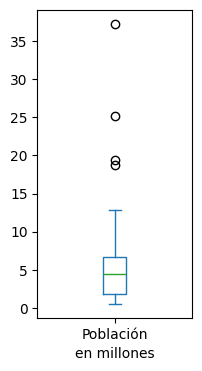

In [76]:
#Grafica de diagrama de caja
ax=(data.Población/1000000).plot.box(figsize=(2,4))
ax.set_xlabel("en millones")

###4.2 Diagrama de frecuencia

In [105]:
#Calculando diagrama de frecuencia
binnedPopulation=pd.cut(data["Población"]/1000000,10)
binnedPopulation.value_counts()

,count
Población,
"(0.527, 4.233]",24
"(4.233, 7.902]",14
"(7.902, 11.571]",6
"(11.571, 15.24]",2
"(15.24, 18.909]",1
"(18.909, 22.578]",1
"(22.578, 26.247]",1
"(33.585, 37.254]",1
"(26.247, 29.916]",0


###4.3 Histograma

Text(0.5, 0, 'Población en millones')

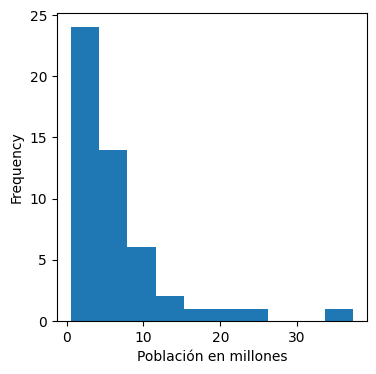

In [34]:
#Histograma
ax=(data.Población/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población en millones")

###4.4 Diagrama de densidad

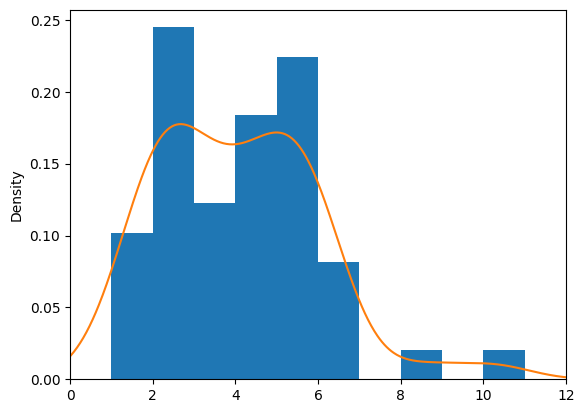

In [38]:
#Diagrama de disperción y curva de densidad
ax=data["Tasa de asesinatos"].plot.hist(density=True, xlim=[0,12],bins=range(1,12))
data["Tasa de asesinatos"].plot.density(ax=ax)
ax.set_label("Tasa de asesinatos por 1M de habitantes")

#Tarea: Hacer estas graficas con el dataset propio

In [40]:
df_mine=pd.read_csv("/content/drive/MyDrive/8vo Semestre/Fundamentos ciencia de datos/smmh.csv")

In [41]:
df_mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [71]:
df_mine["1. What is your age?"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,1. What is your age?
0.05,18.0
0.25,21.0
0.50,22.0
0.75,26.0
0.95,48.0


Text(0.5, 0, '¿Cuál es su edad?')

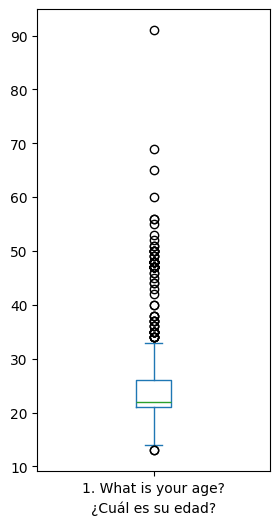

In [74]:
#Grafica de diagrama de caja
ax=(df_mine["1. What is your age?"]).plot.box(figsize=(3,6))
ax.set_xlabel("¿Cuál es su edad?")

In [107]:
#Calcuar diagrama de frecuencia
binnedPopulation=pd.cut(df_mine["15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?"],5)
binnedPopulation.value_counts()

,count
"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
"(0.996, 1.8]",110
"(1.8, 2.6]",108
"(2.6, 3.4]",101
"(4.2, 5.0]",85
"(3.4, 4.2]",77


Text(0.5, 0, 'Comparación propia con otras personas en redes')

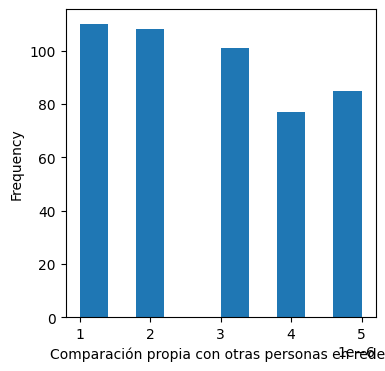

In [108]:
#Histograma
ax=(df_mine["15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Comparación propia con otras personas en redes")

Text(0.5, 0, 'Nubes en mi cabeza')

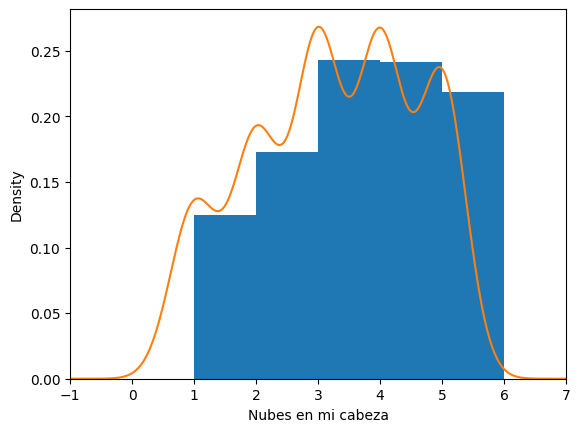

In [90]:
#Diagrama de disperción y curva de densidad
ax=df_mine["18. How often do you feel depressed or down?"].plot.hist(density=True, xlim=[-1,7],bins=range(1,10))
df_mine["18. How often do you feel depressed or down?"].plot.density(ax=ax)
ax.set_xlabel("Nubes en mi cabeza")